In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import uproot

In [2]:
from scipy.special import erfinv
from scipy.stats import chi2

In [3]:
f_Asimov_Wilks_x1 = uproot.open("~/wc_framework/TLee_Np0p/fifteen_by_fifteen/nominal.root")
f_Asimov_Wilks_no_disable = uproot.open("~/wc_framework/TLee_Np0p/fifteen_by_fifteen/no_xs_at_all.root")

#f_Asimov_Wilks_x2 = uproot.open("~/wc_framework/TLee_Np0p/twenty_by_twenty_Asimov_only/doubled.root")
#f_Asimov_Wilks_x4 = uproot.open("~/wc_framework/TLee_Np0p/twenty_by_twenty_Asimov_only/quadrupled.root")
#f_Asimov_Wilks_no_flux_xs = uproot.open("~/wc_framework/TLee_Np0p/twenty_by_twenty_Asimov_only/no_flux_xs.root")
#f_Asimov_Wilks_no_detvar = uproot.open("~/wc_framework/TLee_Np0p/twenty_by_twenty_Asimov_only/no_detsys.root")


In [4]:
wc_lee_vals_one_dim = f_Asimov_Wilks_x1["h2d_space"].to_numpy()[1]

wc_sigma_values_x1 = np.sqrt(2.) * erfinv(np.transpose(f_Asimov_Wilks_x1["h2d_space"].to_numpy()[0]))
wc_sigma_values_no_disable = np.sqrt(2.) * erfinv(np.transpose(f_Asimov_Wilks_no_disable["h2d_space"].to_numpy()[0]))
#wc_sigma_values_x2 = np.sqrt(2.) * erfinv(np.transpose(f_Asimov_Wilks_x2["h2d_space"].to_numpy()[0]))
#wc_sigma_values_x4 = np.sqrt(2.) * erfinv(np.transpose(f_Asimov_Wilks_x4["h2d_space"].to_numpy()[0]))
#wc_sigma_values_no_flux_xs = np.sqrt(2.) * erfinv(np.transpose(f_Asimov_Wilks_no_flux_xs["h2d_space"].to_numpy()[0]))
#wc_sigma_values_no_detvar = np.sqrt(2.) * erfinv(np.transpose(f_Asimov_Wilks_no_detvar["h2d_space"].to_numpy()[0]))


In [5]:
wc_sigma_values_x1[0]

array([0.08686062, 0.03552683, 0.15085365, 0.38684226, 0.68924817,
       1.02219311, 1.36694364, 1.71454969, 2.06089071, 2.40415002,
       2.74361176, 3.07908919, 3.41064802, 3.73846978, 4.0627832 ])

In [6]:
wc_sigma_values_no_disable[0]

array([0.08686062, 0.03552683, 0.15085365, 0.38684226, 0.68924817,
       1.02219311, 1.36694364, 1.71454969, 2.06089071, 2.40415002,
       2.74361176, 3.07908919, 3.41064802, 3.73846978, 4.0627832 ])

In [7]:
# from MiniBooNE 2021, https://journals.aps.org/prd/abstract/10.1103/PhysRevD.103.052002
# 200 < E_nu^QE < 1250 MeV, neutrino mode and antineutrino mode


total_miniboone_excess = 638.0
total_miniboone_uncertainty = np.sqrt(52.1**2+122.2**2)
miniboone_NC_delta_pred = 251.9 + 34.7


extend_to_zero = True # takes the lowest bins in 0p and Np and moves them to zero
# (should be approximately correct as the bins get smaller, and should be exactly correct away from the boundaries)

bin_edges = np.linspace(0., wc_lee_vals_one_dim[-1], wc_sigma_values_x1.shape[0] + 1)
x_delta_nps = np.array([(bin_edges[i] + bin_edges[i+1]) / 2. for i in range(len(bin_edges)-1)])
x_delta_0ps = np.array([(bin_edges[i] + bin_edges[i+1]) / 2. for i in range(len(bin_edges)-1)])

if extend_to_zero:
    x_delta_nps[0] = 0.
    x_delta_0ps[0] = 0.

x_delta_npsv, x_delta_0psv = np.meshgrid(x_delta_nps, x_delta_0ps)

miniboone_sigmas, _ = np.meshgrid(x_delta_nps, x_delta_0ps) # just for shape, will get each entry replaced

for j in range(x_delta_nps.shape[0]):
    for i in range(x_delta_0ps.shape[0]):
                
        x_delta_np = x_delta_npsv[i,j]
        x_delta_0p = x_delta_0psv[i,j]
        
        miniboone_template_excess = total_miniboone_excess + miniboone_NC_delta_pred * (1. - 0.5 * x_delta_np - 0.5 * x_delta_0p)
        miniboone_sigmas[i,j] = np.abs(miniboone_template_excess) / total_miniboone_uncertainty
        

In [8]:
print(wc_sigma_values_x1.shape, miniboone_sigmas.shape)

(15, 15) (15, 15)


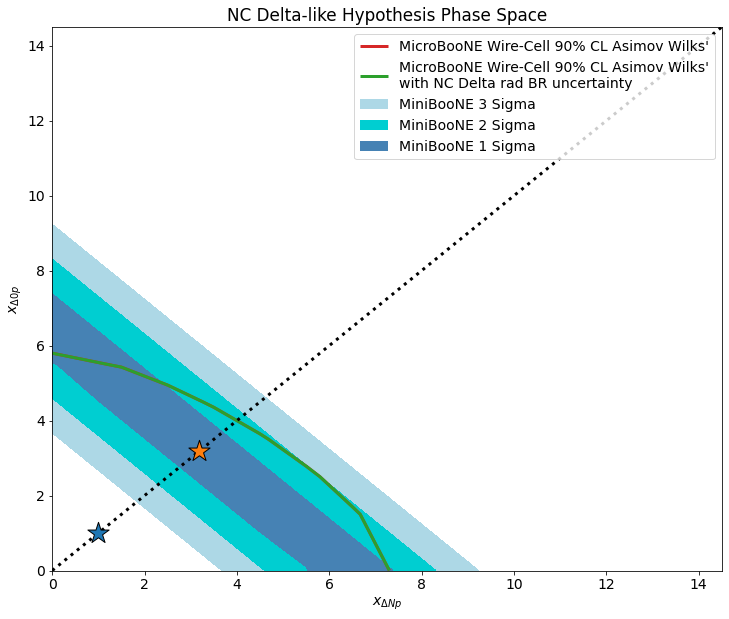

In [9]:
plt.rcParams.update({'font.size': 14})
mpl.rcParams['lines.linewidth'] = 3


fig, ax = plt.subplots(figsize=(12,10))

miniboone_colors = ["lightblue", "darkturquoise", "steelblue"]
miniboone_CS = ax.contourf(x_delta_npsv, x_delta_0psv, miniboone_sigmas, [0, 3], colors=miniboone_colors[0])
miniboone_CS = ax.contourf(x_delta_npsv, x_delta_0psv, miniboone_sigmas, [0, 2], colors=miniboone_colors[1])
miniboone_CS = ax.contourf(x_delta_npsv, x_delta_0psv, miniboone_sigmas, [0, 1], colors=miniboone_colors[2])

    
wc_x1 = ax.contour(x_delta_npsv, x_delta_0psv, wc_sigma_values_x1, [1.64485], colors=["tab:red"], linestyles=["solid"])
wc_no_disable = ax.contour(x_delta_npsv, x_delta_0psv, wc_sigma_values_no_disable, [1.64485], colors=["tab:green"], linestyles=["solid"])
#wc_x2 = ax.contour(x_delta_npsv, x_delta_0psv, wc_sigma_values_x2, [1.64485], colors=["tab:green"], linestyles=["solid"])  
#wc_x4 = ax.contour(x_delta_npsv, x_delta_0psv, wc_sigma_values_x4, [1.64485], colors=["tab:orange"], linestyles=["solid"])

#wc_no_flux_xs = ax.contour(x_delta_npsv, x_delta_0psv, wc_sigma_values_no_flux_xs, [1.64485], colors=["tab:blue"], linestyles=["solid"])
#wc_no_detvar = ax.contour(x_delta_npsv, x_delta_0psv, wc_sigma_values_no_detvar, [1.64485], colors=["tab:purple"], linestyles=["solid"])


plt.plot([0, x_delta_nps[-1]], [0, x_delta_0ps[-1]], color="k", linestyle="dotted", label="NC Delta Scaling Hypothesis")

plt.scatter(1, 1, label="Standard Model", marker="*", s=500, edgecolors='black', color="tab:blue", zorder=10)
plt.scatter(3.18, 3.18, label="NC Delta Scaling LEE hypothesis", marker="*", s=500, edgecolors='black', color="tab:orange", zorder=10)


h1,_ = wc_x1.legend_elements()
hno_disable,_ = wc_no_disable.legend_elements()
#h2,_ = wc_x2.legend_elements()
#h4,_ = wc_x4.legend_elements()
#hno_flux_xs,_ = wc_no_flux_xs.legend_elements()
#hno_detvar,_ = wc_no_detvar.legend_elements()

handles = [h1[0], hno_disable[0]]
labels = ["MicroBooNE Wire-Cell 90% CL Asimov Wilks'", "MicroBooNE Wire-Cell 90% CL Asimov Wilks'\nwith NC Delta rad BR uncertainty"]

#handles = [h1[0], h2[0], h4[0], hno_flux_xs[0], hno_detvar[0]]
#labels = ["MicroBooNE Wire-Cell 90% CL Asimov Wilks'",
#                                  "MicroBooNE Wire-Cell 90% CL Asimov Wilks', x2 stats", 
#                                  "MicroBooNE Wire-Cell 90% CL Asimov Wilks', x4 stats",
#                                  "MicroBooNE Wire-Cell 90% CL Asimov Wilks', no Flux/Xs uncertainty",
#                                  "MicroBooNE Wire-Cell 90% CL Asimov Wilks', no Detector uncertainty"]

proxy = [plt.Rectangle((0,0),1,1,fc=miniboone_colors[_]) for _ in range(3)]
proxy_labels = ["MiniBooNE 1 Sigma", "MiniBooNE 2 Sigma", "MiniBooNE 3 Sigma"][::-1]
L = plt.legend(handles + proxy, labels + proxy_labels, loc="upper right")


plt.xlabel(r"$x_{\Delta Np}$")
plt.ylabel(r"$x_{\Delta 0p}$")
plt.title("NC Delta-like Hypothesis Phase Space")
plt.savefig(f"./plots/asimov_wilks_v1.png", dpi=300)
